# Voting Classifier Algorithm:

- A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts 
  an output(class) based on their highest probability of chosen class as the output.
    
- It simply aggregates the findings of each classifier passed into Voting Classsifierand predicts the output class based
   on the highest majority of voting.
    
- The idea is instead of creating seperate dedicated models and finding the accuracy for each them, we create a single
  model which trains by these models and predicts output based on their combined majority of voting for each output class.

<img src="https://miro.medium.com/max/1200/1*3C_F3p_rE9sRSG0N8kO4-w.png"/>

#### Voting Classifier supports two types of votings.

#### 1. Hard Voting: 

  Here voting is calculated on the predicted output class.

- In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the 
  highest probability of being predicted by each of the classifiers.
  
- Suppose three classifiers predicted the output class(A,A,B), so here the majority predicted A as output. Hence A will
  be the final prediction.
  
  
#### 2. Soft Voting: 

  Voting is calculated on the predicted probability of the output class.

- In soft voting, the output class is the prediction based on the average of probability given to that class.

- Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and 
  B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because 
  it had the highest probability averaged by each classifier.

#### How Voting Classifier can improve the performance?

- The Voting Classifier aggregates the predicted class or predicted probability on basis of hard voting or soft voting.
  So if we feed a variety of base models to the voting classifier it makes sure to resolve the error by any model.


<img src="https://miro.medium.com/max/2000/1*IG6Pe5FmrkEJlCmEQt1e5g.png"/>

### Here i using wine dataset to perform voting classifier..

<img src=""/>

In [1]:
# import required libraries..

import numpy as np
import pandas as pd

In [2]:
# import warnings to avoid warnings..

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the wine dataset..

import os
from sklearn import datasets
from sklearn.datasets import load_wine
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [53]:
# convert text data into Dataframe..

df = pd.DataFrame(data.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [54]:
# column names in dataframe..

dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [56]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [57]:
x = data['data']
y = data['target']
x, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [58]:
# train and test the data..

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=23)

In [59]:
# finndout the shape..

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [60]:
# import required classifiers using sklearn..

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
svc = SVC()
lg = LogisticRegression()
knn = KNeighborsClassifier()
ds = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc, lg, knn, ds, rf

In [63]:
# fit the models..

svc.fit(x_train,y_train), lg.fit(x_train,y_train), knn.fit(x_train,y_train), ds.fit(x_train,y_train), rf.fit(x_train,y_train)

(SVC(),
 LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier())

In [66]:
# before using voting classifier the accuracy score..

print('svc:', svc.score(x_test,y_test)) 
print('lg:', lg.score(x_test,y_test)) 
print('knn:', knn.score(x_test,y_test))
print('ds:', ds.score(x_test,y_test))
print('rf:', rf.score(x_test,y_test))

svc: 0.8333333333333334
lg: 1.0
knn: 0.5555555555555556
ds: 0.9722222222222222
rf: 1.0


## Soft Score Voting:

In [67]:
# take different classifiers..

svc = SVC(probability = True)
lg = LogisticRegression()
knn = KNeighborsClassifier()
ds = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc, lg, knn, ds, rf

(SVC(probability=True),
 LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier())

In [75]:
vt = VotingClassifier(estimators = [("svc", svc), ("lg", lg), ("knn", knn), ("ds", ds), ("rf", rf)],
                                      voting = "soft",
                                      weights = [0.32, 0.45, 0.49, 0.56, 0.23])

In [76]:
# fit the model..

vt.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('ds', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft', weights=[0.32, 0.45, 0.49, 0.56, 0.23])

In [77]:
# findout the y predict value..

y_pred = vt.predict(x_test)
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2])

In [71]:
# accuracy score of soft score voting..

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.9722222222222222

## Hard  Score Voting:

In [37]:
# take different classifiers..

svc = SVC()
lg = LogisticRegression()
knn = KNeighborsClassifier()
ds = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc, lg, knn, ds, rf

(SVC(),
 LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier())

In [38]:

vt1 = VotingClassifier(estimators = [("svc", svc), ("lg", lg), ("knn", knn), ("ds", ds), ("rf", rf)],
                                      voting = "hard")

In [39]:
# fit the model..

vt1.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC()), ('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('ds', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [47]:
# accuracy score of hard voting..

score1 = accuracy_score(y_test,y_pred)
score1

0.9722222222222222

In [48]:
# accuracy score of hard & soft voting..

print('soft score voting :', score)
print('hard score voting :', score1)

soft score voting : 0.9722222222222222
hard score voting : 0.9722222222222222


In [49]:
# classification report..

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [51]:
# confusion matrix..

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]], dtype=int64)

### Data Visualisation using Heatmap:

Text(60.0, 0.5, 'True')

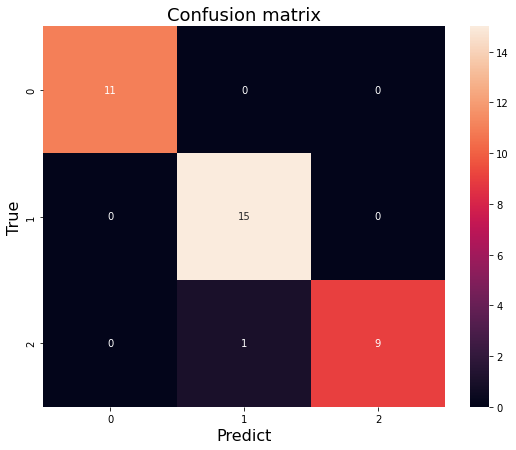

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix',size=18)
plt.xlabel('Predict',size=16)
plt.ylabel('True',size=16)